## Машинное обучение 1, ПМИ ФКН ВШЭ

## Практическое домашнее задание 1

### Общая информация

Дата выдачи: 19.09.2023

Мягкий дедлайн: 23:59MSK 02.10.2023

Жесткий дедлайн: 23:59MSK 06.10.2023

### О задании

Задание состоит из двух разделов, посвященных работе с табличными данными с помощью библиотеки pandas и визуализации с помощью matplotlib. В первом разделе вам предстоит выполнить базовые задания с помощью вышеуказанных библиотек, а во втором распределить студентов по курсам. Баллы даются за выполнение отдельных пунктов. Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Задание направлено на освоение jupyter notebook (будет использоваться в дальнейших заданиях), библиотек pandas и matplotlib.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после жёсткого дедлайна нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно получить у семинариста или ассистента. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-01-pandas-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

## 0. Введение

Сейчас мы находимся в jupyter-ноутбуке (или ipython-ноутбуке). Это удобная среда для написания кода, проведения экспериментов, изучения данных, построения визуализаций и других нужд, не связанных с написанием production-кода. 

Ноутбук состоит из ячеек, каждая из которых может быть либо ячейкой с кодом, либо ячейкой с текстом размеченным и неразмеченным. Текст поддерживает markdown-разметку и формулы в Latex.

Для работы с содержимым ячейки используется *режим редактирования* (*Edit mode*, включается нажатием клавиши **Enter** после выбора ячейки), а для навигации между ячейками искользуется *командный режим* (*Command mode*, включается нажатием клавиши **Esc**). Тип ячейки можно задать в командном режиме либо с помощью горячих клавиш (**y** to code, **m** to markdown, **r** to edit raw text), либо в меню *Cell -> Cell type*. 

После заполнения ячейки нужно нажать *Shift + Enter*, эта команда обработает содержимое ячейки: проинтерпретирует код или сверстает размеченный текст.

In [1]:
# ячейка с кодом, при выполнении которой появится output
2 + 2

4

Попробуйте создать свои ячейки, написать какой-нибудь код и текст какой-нибудь формулой.

In [2]:
# your code

[Здесь](https://athena.brynmawr.edu/jupyter/hub/dblank/public/Jupyter%20Notebook%20Users%20Manual.ipynb) находится <s>не</s>большая заметка о используемом языке разметки Markdown. Он позволяет:

0. Составлять упорядоченные списки
1. Выделять *текст* <s>при</s> **необходимости**
2. Добавлять [ссылки](http://imgs.xkcd.com/comics/the_universal_label.png)


* Составлять неупорядоченные списки

Делать вставки с помощью LaTex:
    
$
\left\{
\begin{array}{ll}
x = 16 \sin^3 (t) \\ 
y = 13 \cos (t) - 5 \cos (2t) - 2 \cos (3t) - \cos (4t) \\
t \in [0, 2 \pi]
\end{array}
\right.$

А ещё можно вставлять картинки, или гифки, или что захотите:

<img src="https://media1.tenor.com/images/9b8fbe9214504bcf6c60fe4e4f7e114e/tenor.gif?itemid=5416416" style="width: 400px">

### Google Colab

Что за колаб? 

**Google Colab (Colaboratory)** это **Jupyter Notebook + Cloud + Google Drive.**

Компания Google предоставляет возможность бесплатно запускать ноутбуки (предварительно загрузив их на свой гугл-диск) прямо в облаке. При этом вам не требуется установка никаких пакетов на свою машину, а работать можно прямиком из браузера. Вот ссылка:

https://colab.research.google.com

При использовании вы увидете много сходств с jupyter ноутбуком. Одним из преимуществ является доступность GPU, соответствующую опцию можно активировать в настройках сервиса. При желании вы сможете найти в интернете много туториалов по использованию или разобраться самостоятельно =)

## 1. Табличные данные и Pandas

Pandas — удобная библиотека для работы с табличными данными в Python, если данных не слишком много и они помещаются в оперативную память вашего компьютера. Несмотря на неэффективность реализации и некоторые проблемы, библиотека стала стандартом в анализе данных.

Основной объект в pandas — это DataFrame, представляющий собой таблицу с именованными колонками различных типов, индексом (может быть многоуровневым). DataFrame можно создавать, считывая таблицу из файла или задавая вручную из других объектов.

В этой части потребуется выполнить несколько небольших заданий. Можно пойти двумя путями: сначала изучить материалы, а потом приступить к заданиям, или же разбираться "по ходу". Выбирайте сами.

Материалы:
1. [Pandas за 10 минут из официального руководства](http://pandas.pydata.org/pandas-docs/stable/10min.html)
2. [Документация](http://pandas.pydata.org/pandas-docs/stable/index.html) (стоит обращаться, если не понятно, как вызывать конкретный метод)
3. [Примеры использования функционала](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb)

Многие из заданий можно выполнить несколькими способами. Не существуют единственно верного, но попробуйте максимально задействовать арсенал pandas и ориентируйтесь на простоту и понятность вашего кода. Мы не будем подсказывать, что нужно использовать для решения конкретной задачи, попробуйте находить необходимый функционал сами (название метода чаще всего очевидно). В помощь вам документация, поиск и stackoverflow.

In [89]:
%pylab inline
import pandas as pd

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<span style="color:red">Перед выполнением задания необходимо ознакомиться с первым семинаром (seminars/sem01-pandas.ipynb) </span>.

Это поможет вам получить общее понимание происходяшего и успешнее справиться с заданием.

Также успешному выполнению способствует внимательное чтение текста задания от начала до конца.

Удачи!

Скачаем подготовленные на семинаре данные:

In [90]:
#!wget  -O 'end_seminar.xlsx' -q 'https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=0'

In [91]:
# Укажите нужный вам движок чтения файлов Excel
df = pd.read_excel('../MO FTDA/_end_seminar.xlsx')

In [92]:
#df

Для пользователей Windows: скачайте файл самостоятельно и поместите его в папку с тетрадкой. Или попробуйте один из следующих вариантов:

In [93]:
#!powershell iwr -outf somefile https://somesite/somefile

In [94]:
#!pip install wget
#import wget 
#wget.download('https://dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=1', 'end_seminar.xlsx')

##### В первой части задания (до раздела "Распределение студентов по курсам") использование циклов запрещается и повлечет за собой снижение оценки. Использование <code>vectorize</code> и  <code>apply</code>, <code>apply_along_axis</code> крайне нежелательно.

Для каждой задачи из этого раздела вы должны написать код для получения ответа, а также дать текстовый ответ, если он предполагается.

На некоторые вопросы вы можете получить путём пристального взгляда на таблицу, но это не будет засчитываться. Вы в любом случае должны получить ответ с помощью кода.

#### 1. [0 баллов] Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.

Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы? (на это не надо отвечать, просто подумайте об этом)

In [95]:
# your code
df.head(10)

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,NaN,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,NaN,NaN,NaN
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,NaN,NaN,NaN
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,NaN,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,NaN,NaN,NaN
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,NaN,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,NaN,NaN,NaN
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,NaN,NaN,NaN
5,2020-05-15 09:10:18.558,d0d8ff53ed5b119f9056068e954256c6,591,187.0,NaN,Язык SQL,Statistical Learning Theory,Сбор и обработка данных с помощью краудсорсинга,Промышленное программирование на языке Java,Численные методы,Дискретная оптимизация,Да,0.690583,NaN,NaN,NaN
6,2020-05-15 11:42:16.910,e4caca755ee0bdd711e18fb8084958b5,724,181.0,NaN,Statistical Learning Theory,Безопасность компьютерных систем,Моделирование временных рядов,Численные методы,Промышленное программирование на языке Java,Машинное обучение 2,Да,0.103139,NaN,NaN,NaN
7,2020-05-15 12:11:43.252,8047c18b3c531c6f47931e0744f3e028,566,187.0,NaN,Язык SQL,Теория баз данных,Безопасность компьютерных систем,Промышленное программирование на языке Java,Компьютерные сети,Дискретная оптимизация,Да,0.802691,NaN,NaN,NaN
8,2020-05-15 13:21:40.913,e8b314842f176be9051d14a07cb156cb,618,181.0,NaN,Язык SQL,Теория баз данных,Матричные вычисления,Промышленное программирование на языке Java,Компьютерные сети,Дискретная оптимизация,Да,0.565022,NaN,NaN,NaN
9,2020-05-15 13:29:10.789,d6c079f1ff869c8c84fa3ed30bd67e0e,733,181.0,NaN,Теория баз данных,Высокопроизводительные вычисления,Сбор и обработка данных с помощью краудсорсинга,Дополнительные главы прикладной статистики,Анализ данных в бизнесе,Численные методы,Да,0.085202,NaN,NaN,1.0


In [96]:
#df.sample(10)

In [97]:
#from IPython.display import display
#display(df.head(10),df.sample(10))

#### 2. [0.5 балла] Есть ли в данных пропуски? В каких колонках? Сколько их в каждой из этих колонок?

In [98]:
# your code
df.isna().sum()

timestamp          0
id                 0
rating             0
18_group         138
is_mi            343
fall_1             0
fall_2             0
fall_3             0
spring_1           0
spring_2           0
spring_3           0
is_first_time      2
percentile         0
17_group         223
blended          223
is_ml_student    304
dtype: int64

In [99]:
df.isna().sum()

timestamp          0
id                 0
rating             0
18_group         138
is_mi            343
fall_1             0
fall_2             0
fall_3             0
spring_1           0
spring_2           0
spring_3           0
is_first_time      2
percentile         0
17_group         223
blended          223
is_ml_student    304
dtype: int64

Заполните пропуски пустой строкой для строковых колонок и нулём для числовых (постарайтесь избежать перечисления названий всех столбцов).

In [100]:
df['18_group'] = df['18_group'].fillna(0)
df['is_mi'] = df['is_mi'].fillna(0)
df['is_first_time'] = df['is_first_time'].fillna("")
df['17_group'] = df['17_group'].fillna(0)
df['blended'] = df['blended'].fillna("")
df['is_ml_student']=df['is_ml_student'].fillna(0)

#### 3. [0.5 балла] Посмотрите повнимательнее на колонку 'is_first_time'. 

Есть ли в ней ответы "Нет"? Сколько их?

Если вы найдете повторные обращения студентов, оставьте только самую позднюю версию. В дальнейших заданиях используйте версию данных без повторов.

<i>Обращения со значением "Нет" в 'is_first_time' могут быть как повторными, так и первичными, поскольку поле заполняли сами студенты.</i>

In [101]:
# your code
df['is_first_time'].value_counts()

is_first_time
Да     308
Нет     51
         2
Name: count, dtype: int64

In [102]:
#fil = df.query("is_first_time == 'Нет'")
group_net = df.groupby(['id'])['is_first_time'].count()
group_filt = group_net > 1
gr = group_net[group_filt]
gr

id
47e2d8bbb630bc2d9b3fbf98fe77cffb    2
50f6d5b6a7fd6c8b1b8959f9ce1f808d    2
5c49473012411a1eee72f8ea63767adf    2
5ee2ad618729a6dc3bdb7f2858826ef0    2
86c24daaa62246142d46ee58534a65e0    2
8aa0f1b7331b49464174b02cd693be52    2
9015b809a29fb65ce23d7addf16d770d    2
906692ccd33f59058380aac1598c5480    2
9a66d84568b8017d98eb2e678b57296b    2
a65d50ef4fadfac64508a54e972d8623    2
b121e4d7d62387cd5199cca464a34a6d    2
d9c068e5578253c2b0721558dd0813e1    2
f8fab519d78047712c06798c8b7fe38f    2
ffc58d371e2f52e1c7f45d49d3d629d0    2
Name: is_first_time, dtype: int64

In [103]:
dups = df['id'].duplicated()

In [104]:
df_filtered = df[~((df.duplicated(subset='id', keep=False)) & (df['is_first_time'] == 'Да'))]

In [105]:
#df_filtered

In [106]:
df_filtered['is_first_time'].value_counts()

is_first_time
Да     294
Нет     51
         2
Name: count, dtype: int64

#### 4. [0.5 балла] Ответьте на вопросы:
1. Сколько было заявок из групп 18-го года набора, а сколько из групп 17-го года?
2. Есть ли студенты с равными перцентилями (среди объединенных данных, ведь конкурс на каждый курс общий)?

In [107]:
# your code
count_18 = df_filtered[df_filtered['18_group'] != 0]
count_18 = count_18.count()
count_18['18_group']

213

In [108]:
# your code
count_17 = df_filtered[df_filtered['17_group'] != 0]
count_17 = count_17.count()
count_17['17_group']

134

In [109]:
#df_filtered

In [110]:
dupl_perc = df_filtered[df_filtered.duplicated('percentile',keep = False)]

In [111]:
dupl_perc

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
80,2020-05-18 17:09:23.589,3e106aaef8b24dbb01319c73e14c2936,784,182.0,0.0,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,Дискретная оптимизация,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,Да,0.0,0.0,,1.0
231,2020-05-14 21:52:43.844,3a7326c9e355a67d3805824ca34c4bc5,1457,0.0,0.0,Statistical Learning Theory,Высокопроизводительные вычисления,Statistical Learning Theory,Символьные вычисления,Численные методы,Символьные вычисления,Да,0.0,173.0,Введение в дифференциальную геометрию,0.0


#### 5. [0.5 балла] Какие  blended-курсы для четверокурсников существуют? На какой blended-курс записалось наибольшее количество студентов? На каком из blended-курсов собрались студенты с самым высоким средним рейтингом (выведите этот курс и количество студентов на нем)? 

In [112]:
# your code
df_filtered['blended'].value_counts()

blended
                                         213
DevOps                                    87
Соревновательный анализ данных            32
Введение в дифференциальную геометрию     15
Name: count, dtype: int64

In [113]:
blended_course = df_filtered.groupby(['blended']).agg(average_rating=('rating', 'mean'),sum_students=('id', 'count')).reset_index()
highest_blend = blended_course.loc[blended_course['average_rating'].idxmax()]

In [114]:
highest_blend

blended           Введение в дифференциальную геометрию
average_rating                              1210.733333
sum_students                                         15
Name: 2, dtype: object

In [115]:
print(f"Курс: {highest_blend['blended']}")
print(f"Количество студентов: {highest_blend['sum_students']}")

Курс: Введение в дифференциальную геометрию
Количество студентов: 15


#### 6. [1 балл] Выясните, есть ли студенты с абсолютно одинаковыми предпочтениями по всем курсам.

Для этого сформируйте таблицу, где для каждого возможного набора курсов посчитано количество студентов, выбравших такой набор, и оставьте только строки где это количество больше 1.

В данном случае набор курсов задается упорядоченным множеством ('fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended'). Элемент blended будет нулевым для 3-го курса.

In [116]:
df_filtered.loc[:, 'Набор дисциплин'] = df_filtered[['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended']].apply(sorted, axis=1).apply(lambda x: ', '.join(x))

/var/folders/22/w_0gdhgj699dgr2cp6bwhn800000gn/T/ipykernel_24135/1514760506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'Набор дисциплин'] = df_filtered[['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended']].apply(sorted, axis=1).apply(lambda x: ', '.join(x))


In [117]:
result = df_filtered.groupby('Набор дисциплин').size().reset_index(name='Количество студентов')
result = result[result['Количество студентов'] > 1]

In [118]:
result

,Набор дисциплин,Количество студентов
15,", Statistical Learning Theory, Безопасность ко...",2
17,", Statistical Learning Theory, Безопасность ко...",6
32,", Statistical Learning Theory, Дискретная опти...",2
42,", Анализ данных в бизнесе, Безопасность компью...",2
68,", Анализ данных в бизнесе, Дополнительные глав...",2
71,", Анализ данных в бизнесе, Компьютерные сети, ...",2
78,", Анализ данных в бизнесе, Моделирование време...",2
86,", Безопасность компьютерных систем, Высокопрои...",2
87,", Безопасность компьютерных систем, Высокопрои...",2
88,", Безопасность компьютерных систем, Высокопрои...",3


#### 7. [0.5 балла] Найдите курсы по выбору, на которые записывались как студенты 18-го года набора, так и студенты 17-го года.

In [119]:
df_17 = df_filtered[df_filtered['17_group'] != 0]

In [120]:
courses17 = df_17.groupby('fall_1')['17_group'].count()

In [121]:
courses17_sp = df_17.groupby('spring_2')['17_group'].count()

In [122]:
courses = df_17.groupby('blended')['17_group'].count()

In [123]:
courses

blended
DevOps                                   87
Введение в дифференциальную геометрию    15
Соревновательный анализ данных           32
Name: 17_group, dtype: int64

In [124]:
courses17

fall_1
Statistical Learning Theory                             11
Анализ неструктурированных данных                       32
Байесовские методы машинного обучения                   16
Безопасность компьютерных систем                        29
Высокопроизводительные вычисления                       24
Глубинное обучение в обработке звука                    10
Моделирование временных рядов                            1
Принятие решений в условиях риска и неопределённости     2
Сбор и обработка данных с помощью краудсорсинга          9
Name: 17_group, dtype: int64

In [125]:
courses17_sp

spring_2
Генеративные модели в машинном обучении                   14
Компьютерное зрение                                       28
Конфликты и кооперация                                    12
Методы сжатия и передачи медиаданных                      35
Обучение с подкреплением                                  14
Проектирование и разработка высоконагруженных сервисов    21
Символьные вычисления                                      5
Численные методы                                           5
Name: 17_group, dtype: int64

In [126]:
df_18 = df_filtered[df_filtered['18_group'] != 0]

In [127]:
courses18 = df_18.groupby('fall_1')['18_group'].count()

In [128]:
courses18_sp = df_18.groupby('spring_2')['18_group'].count()

In [129]:
courses18

fall_1
Statistical Learning Theory                             14
Безопасность компьютерных систем                        81
Высокопроизводительные вычисления                       17
Матричные вычисления                                    14
Моделирование временных рядов                           21
Принятие решений в условиях риска и неопределённости     3
Сбор и обработка данных с помощью краудсорсинга         25
Теория баз данных                                       11
Язык SQL                                                27
Name: 18_group, dtype: int64

In [130]:
courses18_sp

spring_2
Анализ данных в бизнесе                        18
Дискретная оптимизация                         24
Дополнительные главы прикладной статистики     19
Компьютерные сети                              44
Машинное обучение 2                            18
Промышленное программирование на языке Java    51
Системы баз данных                             17
Численные методы                               22
Name: 18_group, dtype: int64

In [131]:
# Осенний 
merge_fall = pd.merge(courses17,courses18,on = 'fall_1')

In [132]:
merge_fall

,17_group,18_group
fall_1,,
Statistical Learning Theory,11,14
Безопасность компьютерных систем,29,81
Высокопроизводительные вычисления,24,17
Моделирование временных рядов,1,21
Принятие решений в условиях риска и неопределённости,2,3
Сбор и обработка данных с помощью краудсорсинга,9,25


In [133]:
# Весенний 
merge_sp = pd.merge(courses17_sp,courses18_sp,on = 'spring_2')

In [134]:
merge_sp

,17_group,18_group
spring_2,,
Численные методы,5,22


Методом исключения найдите курсы, которые предлагались только студентам 18-го года и только студентам 17-го года.

In [135]:
# your code
fall_merge = pd.merge(courses17, courses18, on='fall_1', how='outer')

In [136]:
fall_merge

,17_group,18_group
fall_1,,
Statistical Learning Theory,11.0,14.0
Анализ неструктурированных данных,32.0,NaN
Байесовские методы машинного обучения,16.0,NaN
Безопасность компьютерных систем,29.0,81.0
Высокопроизводительные вычисления,24.0,17.0
Глубинное обучение в обработке звука,10.0,NaN
Моделирование временных рядов,1.0,21.0
Принятие решений в условиях риска и неопределённости,2.0,3.0
Сбор и обработка данных с помощью краудсорсинга,9.0,25.0


In [137]:
spring_merge = pd.merge(courses17_sp, courses18_sp, on='spring_2', how='outer')

In [138]:
spring_merge

,17_group,18_group
spring_2,,
Генеративные модели в машинном обучении,14.0,NaN
Компьютерное зрение,28.0,NaN
Конфликты и кооперация,12.0,NaN
Методы сжатия и передачи медиаданных,35.0,NaN
Обучение с подкреплением,14.0,NaN
Проектирование и разработка высоконагруженных сервисов,21.0,NaN
Символьные вычисления,5.0,NaN
Численные методы,5.0,22.0
Анализ данных в бизнесе,NaN,18.0


### Визуализации и matplotlib

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. Здесь будут описаны ключевые правила оформления графиков для **всех** домашних заданий.

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

В этом задании вы попробуете построить один из них. Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
- сетка на графике помогает оценить значения в точках на глаз, это обычно полезно, поэтому лучше ее отрисовывать;
- если распределение на гистограмме имеет тяжёлые хвосты, лучше использовать логарифмическую шкалу.

Еще одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html) (обычно сокращается до sns). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 

**5 пунктов после которых ваши графики не будут прежними:**
- для красивой картинки <code>%config InlineBackend.figure_format = 'retina'</code>
- задаем размер (почти) всех графиков (можно выбрать другие значения) <code>plt.rcParams['figure.figsize'] = 8, 5</code>
- размер шрифта подписей графиков <code>plt.rcParams['font.size'] = 12</code>
- формат в котором сохраняется изображение <code>mpl.rcParams['savefig.format'] = 'pdf'</code>
- sns – seaborn, добавляет решетку <code>sns.set_style('darkgrid')</code>

Добавьте эти функции в ячейку ниже. Каждый график все равно придется настраивать отдельно, но указанные строчки позволят значительно упростить процесс.  

In [139]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# your code
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
mpl.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

In [140]:
df_filtered.dtypes

timestamp          datetime64[ns]
id                         object
rating                      int64
18_group                  float64
is_mi                     float64
fall_1                     object
fall_2                     object
fall_3                     object
spring_1                   object
spring_2                   object
spring_3                   object
is_first_time              object
percentile                float64
17_group                  float64
blended                    object
is_ml_student             float64
Набор дисциплин            object
dtype: object

#### 8. [0.5 балла] Постройте график средних рейтингов по дням получения ответов (bar plot).

In [141]:
# Convert the 'timestamp' column to datetime
df_filtered['new_date'] = pd.to_datetime(df_filtered['timestamp'])

# Extract the date part
df_filtered['new_date'] = df_filtered['new_date'].dt.date
  # Вывод: 2020-05-14

/var/folders/22/w_0gdhgj699dgr2cp6bwhn800000gn/T/ipykernel_24135/2002780819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['new_date'] = pd.to_datetime(df_filtered['timestamp'])
/var/folders/22/w_0gdhgj699dgr2cp6bwhn800000gn/T/ipykernel_24135/2002780819.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['new_date'] = df_filtered['new_date'].dt.date


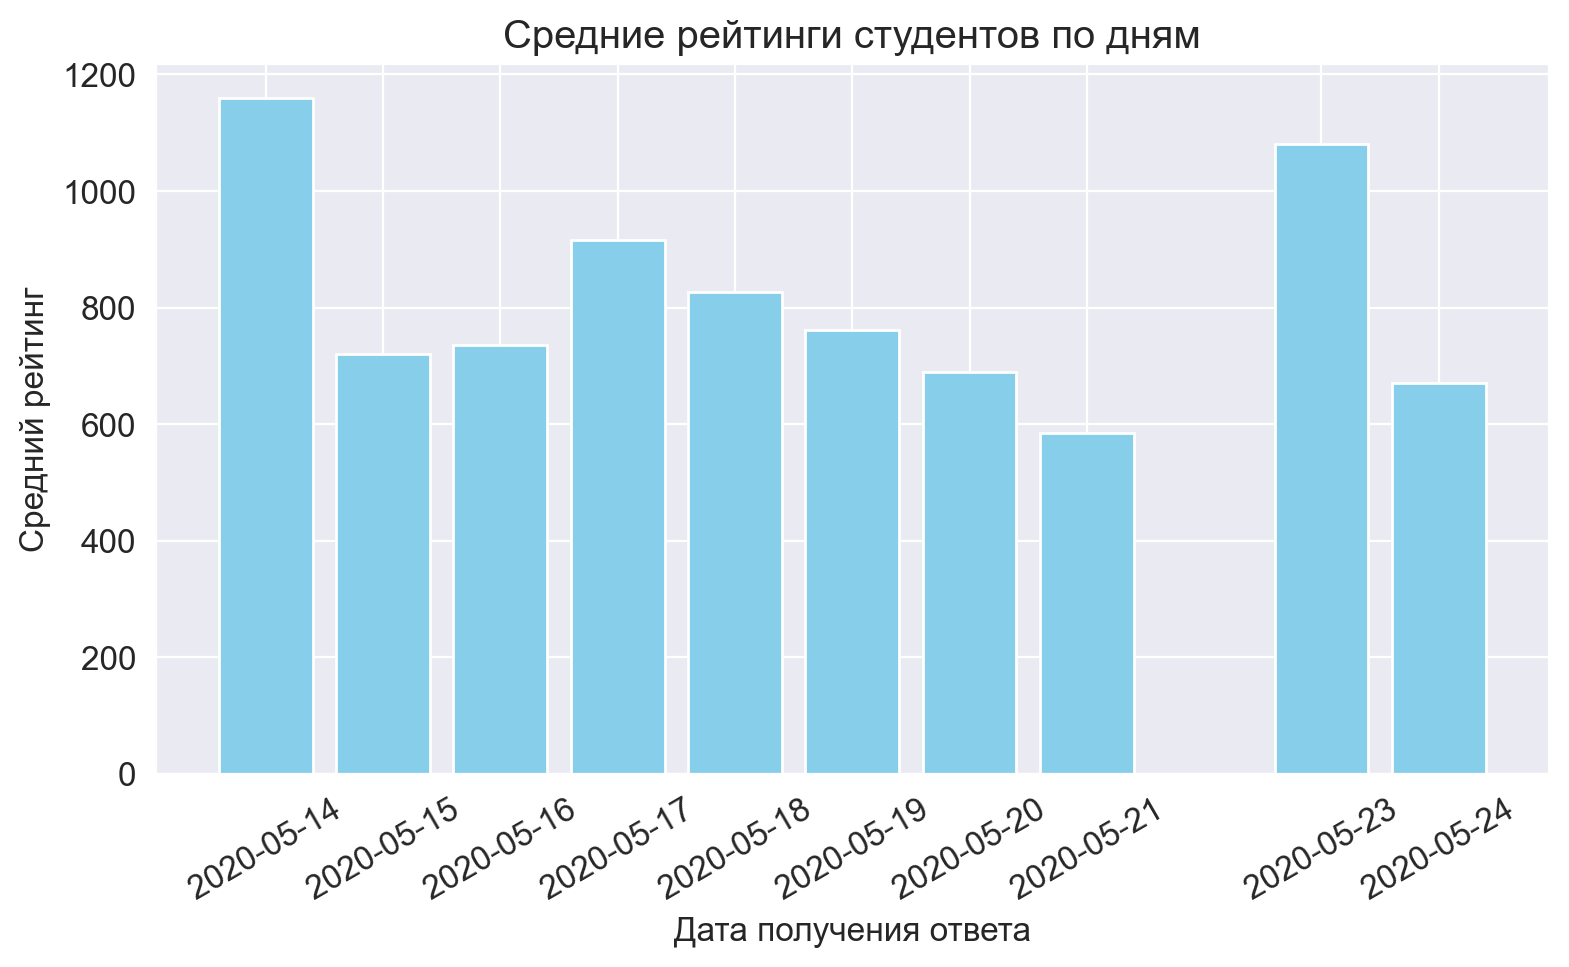

In [142]:
# your code
# Вычисление средних рейтингов по дням
mean_ratings = df_filtered.groupby('new_date')['rating'].mean().reset_index()

# Построение графика
plt.bar(mean_ratings['new_date'], mean_ratings['rating'], color='skyblue')

plt.xlabel('Дата получения ответа')
plt.ylabel('Средний рейтинг')
plt.title('Средние рейтинги cтудентов по дням')

plt.xticks(mean_ratings['new_date'], rotation = 30)
plt.tight_layout()
plt.show()

Сохраните график в формате pdf (так он останется векторизованным).

In [143]:
plt.savefig('mean_rating.pdf')

<Figure size 800x500 with 0 Axes>

### 2. Распределение студентов по курсам.

<span style="color:red">!!!ВНИМАТЕЛЬНО ИЗУЧИТЕ ТЕКСТ НИЖЕ!!!</span>.

<span style="color:orange">Если во время выполнения заданий у вас вознинут вопросы -- еще раз перечитайте текст целиком, скорее всего ответы уже содержатся в нем.</span>

Теперь вам нужно распределить студентов по осенним курсам по выбору, учитывая их предпочтения.

Алгоритм распределения студентов по курсам:
1. По умолчанию на каждой дисциплине по выбору у 3 и 4 курсов может учиться 1 группа (до 30 студентов). Исключения описаны ниже. На blended-дисциплинах для четверокурсников количество мест не ограничено.
2. Проводится первая волна отбора. Для каждой дисциплины формируется список тех, кто указал её первым приоритетом (если студент должен выбрать два курса по выбору, то для него дисциплины, которые он указал первым и вторым приоритетом, рассматриваются как дисциплины первого приоритета). Если желающих больше, чем мест, то выбирается топ по перцентилю рейтинга.
3. На дисциплинах, где остались места после первой волны, формируются списки тех, кто выбрал их вторым приоритетом и еще не прошел на необходимое количество курсов. Места заполняются лучшими по перцентилю рейтинга студентами. После этого проводится такая же процедура для дисциплин третьего приоритета.
4. Если студент не попал на необходимое количество курсов по итогам трёх волн, с ним связывается учебный офис и решает вопрос в индивидуальном порядке.

Обращаем ваше внимание на следующие детали:
- Конкурс на каждый курс общий для 3-го и 4-го курса

- По умолчанию студент выбирает один осенний и один весенний курс по выбору, а также четверокурсники выбирают один blended-курс. Студенты групп 17-го года специализаций МОП и ТИ выбирают по 2 осенних и 2 весенних курса по выбору, также студенты групп 18' специализации МИ выбирают 2 осенних курса. <i>Для студентов, которые выбирают 2 курса (например, осенних) первый приоритет — <code>fall_1</code> и <code>fall_2</code>, второй приоритет — <code>fall_3</code>. Такие студенты участвуют только в двух волнах отбора</i>.

- Студенты специализации МОП не могут выбрать весенним курсом по выбору Машинное обучение 2. **Если студент специализации МОП выбрал Машинное обучение 2, то его приоритеты сдвигаются.** Из-за совпадений первого и второго курса по выбору двигать приоритеты не надо.

- Blended-курсы не трогайте, по ним не надо распределять, на другие курсы они никак не влияют.

- Заведомо известно, что в процессе распределения не возникнет ситуации, когда на одно место претендуют студенты с одинаковым перцентилем.

- Постарайтесь воздержаться от использования циклов там, где это возможно. <i>Допустимо итерироваться по <b>курсам</b>, на которые проводится отбор, и по <b>волнам</b> отбора. Если вы придумаете, как обойтись и без этих циклов, то на усмотрение проверяющего могут быть добавлены бонусные баллы. <b>Дублирование кода не признается успешным избавлением от циклов</b></i>

- На выходе ожидается файл res_fall.csv с результатами распределения на осенние курсы по выбору. Файл должен быть следующего формата:

    * Три колонки: ID, course1, course2
    
    * Если студент не попал на курс, но должен был, то вместо названия курса в ячейке должна быть строка "???"
    
    * Если студент должен выбрать только один курс, то в колонке course2 для него должна стоять строка "-"
    
    * Если студент должен выбрать два курса по выбору, то порядок в колонках course1 и course2 не важен.
    
    * hint: для сохранения воспользуйтесь df.to_csv('solution.csv', index=None)
    

Для работы вам могут понадобиться следующие данные:

- Результаты опроса (вы уже использовали этот файл в первой части задания, но на всякий случай ссылка: https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=0)

- Соответствие номеров групп специализациям:

    * 171, 172 - МОП; 173 - ТИ; 174 — АДИС; 175, 176 — РС; 177 — АПР
    
    * У студентов 18-го года номера групп соответствуют номерам до распределения по специализациям. Это означает, что по номеру группы 18* нельзя однозначно определить специализацию студента. При этом в рамках распределения важно знать информацию только о двух из них: МОП и МИ. Эти знание можно получить из колонок 'is_ml_student
' и 'is_mi' соответственно.

- Ограничения по количеству мест на курсах по выбору:

    * Осенние: везде 30 мест, кроме Statistical Learning Theory (60 мест), Высокопроизводительных вычислений (60 мест), Анализа неструктурированных данных ($\infty$ мест)

    * Весенние: везде 30 мест, кроме Обучения с подкреплением (60 мест), Анализа данных в бизнесе (60 мест).


Кстати, убедитесь, что в данных больше нет пропусков и повторных записей.

#### 0. Проверка

Для начала давайте убедимся, что вы успешно выполнили задания первой части и проверим ваши данные на наличие пропусков и повторов:

In [144]:
assert df_filtered.shape[0] == 347, 'В таблице остались повторы или потеряны данные'

assert df_filtered.isna().sum().sum() == 0, 'В таблице остались пропуски'

Если вы не получили AssertionError, то можете продолжать.

#### 1. [1 балл] Создайте новый признак, обозначающий, сколько осенних курсов должен выбрать студент

В этом вам может помочь информация о специализации и группе стундента.

In [145]:
def count_courses (df_filtered):
    if df_filtered['17_group'] in (171, 172, 173) or df_filtered['is_mi'] == 1:
        return 2
    else:
        return 1
df_filtered['count_courses'] = df_filtered.apply(count_courses, axis=1)
#df_filtered

/var/folders/22/w_0gdhgj699dgr2cp6bwhn800000gn/T/ipykernel_24135/3620802301.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['count_courses'] = df_filtered.apply(count_courses, axis=1)


Проверка:

In [146]:
col_name = 'count_courses'

assert(df_filtered[df_filtered['id'] == '2662600c2c37e11e62f6ee0b88452f22'][col_name] == 2).all()
assert(df_filtered[df_filtered['id'] == 'd555d2805e1d93d4f023e57dc4c8f403'][col_name] == 2).all()
assert(df_filtered[df_filtered['id'] == '8fe79f84f36e3a5d2d6745621321302c'][col_name] == 1).all()
assert(df_filtered[df_filtered['id'] == 'e4caca755ee0bdd711e18fb8084958b5'][col_name] == 1).all()

#### 2. [2 балла] Распределите студентов в соответствии с первым приоритетом

In [5081]:
#Cловарь предметов
capacity = {
    'Statistical Learning Theory':60,
    'Анализ неструктурированных данных': float('inf'),
    'Байесовские методы машинного обучения': 30,
    'Безопасность компьютерных систем': 30,
    'Высокопроизводительные вычисления': 60,
    'Глубинное обучение в обработке звука': 30,
    'Моделирование временных рядов':30,                            
    'Принятие решений в условиях риска и неопределённости':30,   
    'Сбор и обработка данных с помощью краудсорсинга':30,         
    'Матричные вычисления':30,                                   
    'Теория баз данных': 30,                                       
    'Язык SQL':30                                                    
}

In [5082]:
enrolled = {course: 0 for course in capacity} 
assignments = []

def assign_courses(df):
    df_sorted = df.sort_values(by='percentile', ascending=True)  # Отсортировала 
    for idx, row in df_sorted.iterrows():
        assigned_courses = [] 
        max_courses = row['count_courses']
        
        # Хранение уже назначенных курсов для студента
        already_assigned = set()
        
        for choice in (row['fall_1'], row['fall_2']):
            if enrolled[choice] < capacity[choice]:
                if choice not in already_assigned:  # Проверка на повторное назначение
                    assigned_courses.append(choice)
                    enrolled[choice] += 1  
                    already_assigned.add(choice)  # Добавляем курс в уже назначенные
            else:  # Если мест нет
                assigned_courses.append("???")
            if len(assigned_courses) == max_courses:
                break
                
        for course in assigned_courses:
            assignments.append((row['id'], course))
    return assignments  

# Ваш DataFrame df_filtered уже должен быть определен
assignments = assign_courses(df_filtered)

assignments_df = pd.DataFrame(assignments, columns=['id', 'assigned_course'])

assignments_df['course_num'] = assignments_df.groupby('id').cumcount() + 1
result = assignments_df.pivot(index='id', columns='course_num', values='assigned_course')

# Переименовываем колонки
result.columns = [f'course_{i}' for i in result.columns]
result = result.reset_index()

# Заменяем NaN в course_2 на "-"
result['course_2'] = result['course_2'].fillna('-')

# Условие для id 'e0fceae1e285f737630bb6123a1bd85d'
result.loc[result['id'] == 'e0fceae1e285f737630bb6123a1bd85d', 'course_2'] = '???'

In [5083]:
remaining_places = {course: capacity[course] - enrolled[course] for course in capacity}
remaining_df = pd.DataFrame(list(remaining_places.items()), columns=['course', 'remaining_places'])
print(remaining_df)

                                               course  remaining_places
0                         Statistical Learning Theory              27.0
1                   Анализ неструктурированных данных               inf
2               Байесовские методы машинного обучения               6.0
3                    Безопасность компьютерных систем               0.0
4                   Высокопроизводительные вычисления              16.0
5                Глубинное обучение в обработке звука               7.0
6                       Моделирование временных рядов               0.0
7   Принятие решений в условиях риска и неопределё...              22.0
8     Сбор и обработка данных с помощью краудсорсинга               0.0
9                                Матричные вычисления              15.0
10                                  Теория баз данных              16.0
11                                           Язык SQL               1.0


In [5084]:
result = result.merge(df_filtered[['id', 'percentile']], on='id', how='left')
result = result.rename(columns={'percentile': 'percentile'})

In [5085]:
print(assignments_df.isnull().sum()) 

id                 0
assigned_course    0
course_num         0
dtype: int64


Здесь для проверки приведена таблица, в которой есть 2 дополнительные колонки:
    
    1) is_first_place - является ли студент лучшим по перцентили хотя бы на одном из курсов, куда он был зачислен 
    (True / NaN)
    
    2) is_last_place  - является ли студент худшим по перцентили хотя бы на одном из курсов, куда он был зачислен (True / NaN)

In [5086]:
import pandas as pd
data = []
for index, row in result.iterrows():
    courses = [row['course_1'], row['course_2']]
    for course in courses:
        data.append({'course': course, 'id': row['id']})
courses_df = pd.DataFrame(data)
courses_df = courses_df[~courses_df['course'].isin(['???', '-'])]

merge_2 = courses_df.merge(result[['id', 'percentile']], on='id', how='left')
#merge_2

In [5087]:
min_percentiles = merge_2.loc[merge_2.groupby('course')['percentile'].idxmin()][['course', 'percentile', 'id']].rename(columns={'percentile': 'min_percentile'})
max_percentiles = merge_2.loc[merge_2.groupby('course')['percentile'].idxmax()][['course', 'percentile', 'id']].rename(columns={'percentile': 'max_percentile'})

In [5088]:
#min_percentiles

In [5089]:
#max_percentiles

In [5090]:
import numpy as np
df_filtered = df_filtered.merge(min_percentiles[['id']], on=['id'], how='left', indicator=True)
df_filtered['is_first_place'] = (df_filtered['_merge'] == 'both')
df_filtered.drop(columns=['_merge'], inplace=True)

df_filtered = df_filtered.merge(max_percentiles[['id']], on=['id'], how='left', indicator=True)
df_filtered['is_last_place'] = (df_filtered['_merge'] == 'both')
df_filtered.drop(columns=['_merge'], inplace=True)

df_filtered['is_first_place'] = df_filtered['is_first_place'].fillna(False)
df_filtered['is_last_place'] = df_filtered['is_last_place'].fillna(False)

df_filtered['is_first_place'] = df_filtered['is_first_place'].where(df_filtered['is_first_place'] == True, np.nan)
df_filtered['is_last_place'] = df_filtered['is_last_place'].where(df_filtered['is_last_place'] == True, np.nan)

In [5091]:
df = df_filtered

In [5092]:
df = df.drop_duplicates()

In [5093]:
#df

In [5094]:
df['is_first_place'].value_counts()

is_first_place
True    10
Name: count, dtype: int64

In [5095]:
df['is_last_place'].value_counts()

is_last_place
True    12
Name: count, dtype: int64

In [5096]:
#!wget  -O '2_task_check.csv' -q 'https://www.dropbox.com/s/v8o2zzq3iz5gc9w/_2_task_check.csv?dl=0'
check_df = pd.read_csv('_2_task_check.csv')

In [5097]:
check_df['is_first_place'].value_counts()

is_first_place
True    10
Name: count, dtype: int64

In [5098]:
check_df['is_last_place'].value_counts()

is_last_place
True    12
Name: count, dtype: int64

После распределения студентов в соответствии с первым приоритетом добавьте в свой датафрейм аналогичные признаки и запустите проверку:

In [5099]:
fir_col_name = 'is_first_place' # insert name of your new column with is_first_place as str
last_col_name = 'is_last_place'   # insert name of your new column with is_last_place as str


assert((df[df[fir_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)
        ==
        check_df[check_df['is_first_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)
       ).id.values).all()


assert((df[df[last_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)
       == 
       check_df[check_df['is_last_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)
      ).id.values).all()

#### 3. [3 балла] Проведите все три волны отбора студентов на курсы по выбору

In [5100]:
df = pd.merge(result,df,on = 'id')

In [5101]:
#df

In [5102]:
remaining_seats = {
    'Statistical Learning Theory': 27,
    'Анализ неструктурированных данных': float('inf'),
    'Байесовские методы машинного обучения': 6,
    'Безопасность компьютерных систем': 0,
    'Высокопроизводительные вычисления': 16,
    'Глубинное обучение в обработке звука': 7,
    'Моделирование временных рядов': 0,
    'Принятие решений в условиях риска и неопределённости': 22,
    'Сбор и обработка данных с помощью краудсорсинга': 0,
    'Матричные вычисления': 15,
    'Теория баз данных': 16,
    'Язык SQL': 1
}

students2 = df[
    (df['course_2'] == '???') | 
    (df['course_1'] == '???') 
].sort_values(by='percentile_x', ascending=True)

results = []
for index, student in students2.iterrows():
    preferred_course = student['fall_2']  
    secondary_course = student['fall_3'] if student['count_courses'] == 2 else None

    assigned_courses = set()
    if student['course_1'] != '???':
        assigned_courses.add(student['course_1'])
    if student['course_2'] != '???':
        assigned_courses.add(student['course_2'])


    # Проверка для предпочтительного курса
    if preferred_course in remaining_seats and remaining_seats[preferred_course] > 0 and preferred_course not in assigned_courses:
        results.append((student['id'], preferred_course))
        remaining_seats[preferred_course] -= 1
    elif secondary_course and secondary_course in remaining_seats and remaining_seats[secondary_course] > 0 and secondary_course not in assigned_courses and secondary_course not in results:
        results.append((student['id'], secondary_course))
        remaining_seats[secondary_course] -= 1
# Преобразование результатов в DataFrame, если это необходимо
results_df = pd.DataFrame(results, columns=['id', 'assigned_course'])
# В дополнение, если нужно: гарантируем, что для одного id не будет дубликатов курсов
results_df = results_df.drop_duplicates(subset=['id', 'assigned_course']) 

In [5103]:
#results_df

In [5104]:
print("Оставшиеся места на курсах:")
for course, seats in remaining_seats.items():
    print(f"{course}: {seats} мест(а) осталось")

Оставшиеся места на курсах:
Statistical Learning Theory: 19 мест(а) осталось
Анализ неструктурированных данных: inf мест(а) осталось
Байесовские методы машинного обучения: 5 мест(а) осталось
Безопасность компьютерных систем: 0 мест(а) осталось
Высокопроизводительные вычисления: 0 мест(а) осталось
Глубинное обучение в обработке звука: 0 мест(а) осталось
Моделирование временных рядов: 0 мест(а) осталось
Принятие решений в условиях риска и неопределённости: 21 мест(а) осталось
Сбор и обработка данных с помощью краудсорсинга: 0 мест(а) осталось
Матричные вычисления: 6 мест(а) осталось
Теория баз данных: 12 мест(а) осталось
Язык SQL: 0 мест(а) осталось


In [5105]:
#вторая волна
course_2 = pd.DataFrame(results, columns=['student_id', 'course'])

In [5106]:
course_2

,student_id,course
0,081eba3952cfc116e0e9b941d6a974a2,Матричные вычисления
1,d08d06bc5d31e35616fafc59de6f2e34,Матричные вычисления
2,86eebda725013685effcb0c97591132e,Язык SQL
3,7f9d0f835bf734ccd4619041c3475c1c,Statistical Learning Theory
4,31e38f7596f83b72ebba1c6fc6b7a590,Высокопроизводительные вычисления
5,2b844a1be49f4ed2d578fb50b752883b,Матричные вычисления
6,8e8d87fd686122d2c061d7b1eea2d3c5,Высокопроизводительные вычисления
7,b8d4c538f6b47a1a692bec6c2f29152b,Высокопроизводительные вычисления
8,492c677be00bb8223ebbaffa3aff2549,Глубинное обучение в обработке звука
9,6541d659f05e45043d1b65e98e16a718,Матричные вычисления


In [5107]:
for index, row in course_2.iterrows():
    student_id = row['student_id']
    course_name = row['course']
    df.loc[(df['id'] == student_id) & (df['course_1'] == '???'), 'course_1'] = course_name
    df.loc[(df['id'] == student_id) & (df['course_2'] == '???'), 'course_2'] = course_name

In [5108]:
#df.loc[df['course_1'] == df['course_2'], 'course_2'] = '???'

In [5109]:
df['course_1'].value_counts()

course_1
Высокопроизводительные вычисления                       57
???                                                     47
Анализ неструктурированных данных                       36
Statistical Learning Theory                             32
Безопасность компьютерных систем                        29
Язык SQL                                                28
Матричные вычисления                                    23
Моделирование временных рядов                           22
Сбор и обработка данных с помощью краудсорсинга         20
Байесовские методы машинного обучения                   17
Теория баз данных                                       15
Глубинное обучение в обработке звука                    15
Принятие решений в условиях риска и неопределённости     6
Name: count, dtype: int64

In [5110]:
df['course_2'].value_counts()

course_2
-                                                       258
Анализ неструктурированных данных                        18
Глубинное обучение в обработке звука                     15
Сбор и обработка данных с помощью краудсорсинга          10
Statistical Learning Theory                               9
???                                                       8
Байесовские методы машинного обучения                     8
Моделирование временных рядов                             8
Высокопроизводительные вычисления                         3
Теория баз данных                                         3
Принятие решений в условиях риска и неопределённости      3
Язык SQL                                                  2
Матричные вычисления                                      1
Безопасность компьютерных систем                          1
Name: count, dtype: int64

In [5111]:
import pandas as pd
import numpy as np

# Словарь оставшихся мест для курсов
remaining_seats = {  'Statistical Learning Theory': 19,
    'Анализ неструктурированных данных': float('inf'),
    'Байесовские методы машинного обучения': 5,
    'Безопасность компьютерных систем': 0,
    'Высокопроизводительные вычисления': 0,
    'Глубинное обучение в обработке звука': 0,
    'Моделирование временных рядов': 0,
    'Принятие решений в условиях риска и неопределённости': 21,
    'Сбор и обработка данных с помощью краудсорсинга': 0,
    'Матричные вычисления': 6,
    'Теория баз данных': 12,
    'Язык SQL': 0
}

# Получение студентов, которые не зачислены на курсы (count_courses != 2)
students3 = df[
    ((df['course_2'] == '???') | (df['course_1'] == '???')) & (df['count_courses'] != 2)
].sort_values(by='percentile_x', ascending=True)

results = []
for index, student in students3.iterrows():
    preferred_course = student['fall_3']
    
    # Check if the preferred course is already assigned to this student
    assigned_courses = set()
    if student['course_1'] != '???':
        assigned_courses.add(student['course_1'])
    if student['course_2'] != '???':
        assigned_courses.add(student['course_2'])

    # Проверка доступных мест и того, что курс не был уже зачислен
    if preferred_course in remaining_seats and remaining_seats[preferred_course] > 0 and preferred_course not in assigned_courses:
        results.append((student['id'], preferred_course))
        remaining_seats[preferred_course] -= 1

# Преобразование результатов в DataFrame, если это необходимо
results_df = pd.DataFrame(results, columns=['id', 'assigned_course'])

results_df

,id,assigned_course
0,f0f6f3881894172a0f04e79b554b49e6,Принятие решений в условиях риска и неопределё...
1,227347077a7d1d0544ddf5643b97cf8c,Матричные вычисления
2,5ee2ad618729a6dc3bdb7f2858826ef0,Теория баз данных
3,2b0d7dd550bcca4c586cbb27d8478aa8,Матричные вычисления
4,a6ce02b12540bca3cdd15757f8a2e919,Матричные вычисления
5,1c1623a037bd523d687245e6060e6c5b,Теория баз данных
6,253bbe1a2021d0404712a1e4acd22939,Statistical Learning Theory
7,8c3aa7371731bef999519c3de2c47423,Анализ неструктурированных данных
8,f2ed8115db45ef795ced2701fa86515d,Statistical Learning Theory
9,5c49473012411a1eee72f8ea63767adf,Теория баз данных


In [5112]:
results_df = pd.DataFrame(results, columns=['student_id', 'course'])

In [5113]:
results_df

,student_id,course
0,f0f6f3881894172a0f04e79b554b49e6,Принятие решений в условиях риска и неопределё...
1,227347077a7d1d0544ddf5643b97cf8c,Матричные вычисления
2,5ee2ad618729a6dc3bdb7f2858826ef0,Теория баз данных
3,2b0d7dd550bcca4c586cbb27d8478aa8,Матричные вычисления
4,a6ce02b12540bca3cdd15757f8a2e919,Матричные вычисления
5,1c1623a037bd523d687245e6060e6c5b,Теория баз данных
6,253bbe1a2021d0404712a1e4acd22939,Statistical Learning Theory
7,8c3aa7371731bef999519c3de2c47423,Анализ неструктурированных данных
8,f2ed8115db45ef795ced2701fa86515d,Statistical Learning Theory
9,5c49473012411a1eee72f8ea63767adf,Теория баз данных


In [5114]:
for index, row in results_df.iterrows():
    student_id = row['student_id']
    course_name = row['course']
    # Замена "???" на курс в столбце course_1
    df.loc[(df['id'] == student_id) & (df['course_1'] == '???'), 'course_1'] = course_name
    # Замена "???" на курс в столбце course_2
    df.loc[(df['id'] == student_id) & (df['course_2'] == '???'), 'course_2'] = course_name

In [5115]:
print("Оставшиеся места на курсах:")
for course, seats in remaining_seats.items():
    print(f"{course}: {seats} мест(а) осталось")

Оставшиеся места на курсах:
Statistical Learning Theory: 17 мест(а) осталось
Анализ неструктурированных данных: inf мест(а) осталось
Байесовские методы машинного обучения: 5 мест(а) осталось
Безопасность компьютерных систем: 0 мест(а) осталось
Высокопроизводительные вычисления: 0 мест(а) осталось
Глубинное обучение в обработке звука: 0 мест(а) осталось
Моделирование временных рядов: 0 мест(а) осталось
Принятие решений в условиях риска и неопределённости: 20 мест(а) осталось
Сбор и обработка данных с помощью краудсорсинга: 0 мест(а) осталось
Матричные вычисления: 0 мест(а) осталось
Теория баз данных: 6 мест(а) осталось
Язык SQL: 0 мест(а) осталось


In [5116]:
df['course_1'].value_counts()

course_1
Высокопроизводительные вычисления                       57
Анализ неструктурированных данных                       39
Statistical Learning Theory                             34
Матричные вычисления                                    29
Безопасность компьютерных систем                        29
???                                                     29
Язык SQL                                                28
Моделирование временных рядов                           22
Теория баз данных                                       21
Сбор и обработка данных с помощью краудсорсинга         20
Байесовские методы машинного обучения                   17
Глубинное обучение в обработке звука                    15
Принятие решений в условиях риска и неопределённости     7
Name: count, dtype: int64

In [5117]:
df['course_2'].value_counts()

course_2
-                                                       258
Анализ неструктурированных данных                        18
Глубинное обучение в обработке звука                     15
Сбор и обработка данных с помощью краудсорсинга          10
Statistical Learning Theory                               9
???                                                       8
Байесовские методы машинного обучения                     8
Моделирование временных рядов                             8
Высокопроизводительные вычисления                         3
Теория баз данных                                         3
Принятие решений в условиях риска и неопределённости      3
Язык SQL                                                  2
Матричные вычисления                                      1
Безопасность компьютерных систем                          1
Name: count, dtype: int64

In [5118]:
#df

In [5119]:
res_fall = df[['id','course_1', 'course_2']].rename(columns={'id': 'ID','course_1':'course1','course_2':'course2'})

Дополнительная проверка на наличие повторяющихся значений (Т.к. при проверке в ЯК были найдены повторяющиеся курсы)

In [5120]:
res_fall.loc[res_fall['course1'] == res_fall['course2'], 'course2'] = '???'

In [5121]:
res_fall.to_csv('res_fall.csv', index=False)

In [5122]:
res_fall.to_excel('res_fall.xlsx', index=False)

**Отправьте свой файл res_fall.csv в контест (https://contest.yandex.ru/contest/52663/problems/A/) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.**

*Дисклеймер:*

Успешная посылка в контесте является **обязательным** условием получения полного балла за этот (и следующий) пункт. Если добиться успешной посылки не удастся, баллы будут выставляться на усмотрение проверяюшего. 

При этом ОК в контесте не гарантирует полный балл. Оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат.

На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask

**Дополнительное задание. [2 бонусных балла] Распределите таким же образом студентов еще и на весенние курсы по выбору.**

Если ваш код был хорошо структурирован, то это не составит проблем. 

Если вы выполнили это задание, сдайте среди прочего файл res_spring.csv в таком же формате, как и res_fall.csv.

In [61]:
courses18_name = df.groupby('spring_1')['18_group'].count()

In [62]:
courses17_name = df.groupby('spring_1')['17_group'].count()

In [63]:
courses18_name

spring_1
Анализ данных в бизнесе                                   20
Генеративные модели в машинном обучении                    3
Дискретная оптимизация                                    32
Дополнительные главы прикладной статистики                11
Компьютерное зрение                                        9
Компьютерные сети                                         46
Конфликты и кооперация                                    13
Машинное обучение 2                                       36
Методы сжатия и передачи медиаданных                      14
Обучение с подкреплением                                  53
Проектирование и разработка высоконагруженных сервисов    39
Промышленное программирование на языке Java               63
Символьные вычисления                                      6
Системы баз данных                                         9
Численные методы                                           7
Name: 18_group, dtype: int64

In [64]:
courses17_name

spring_1
Анализ данных в бизнесе                                   20
Генеративные модели в машинном обучении                    3
Дискретная оптимизация                                    32
Дополнительные главы прикладной статистики                11
Компьютерное зрение                                        9
Компьютерные сети                                         46
Конфликты и кооперация                                    13
Машинное обучение 2                                       36
Методы сжатия и передачи медиаданных                      14
Обучение с подкреплением                                  53
Проектирование и разработка высоконагруженных сервисов    39
Промышленное программирование на языке Java               63
Символьные вычисления                                      6
Системы баз данных                                         9
Численные методы                                           7
Name: 17_group, dtype: int64

In [65]:
courses18_name = df.groupby('spring_1')['18_group'].count()

Весенние: везде 30 мест, кроме Обучения с подкреплением (60 мест), Анализа данных в бизнесе (60 мест).

In [147]:
capacity = { 'Анализ данных в бизнесе': 60,
'Генеративные модели в машинном обучении':30,
'Дискретная оптимизация': 30,
'Дополнительные главы прикладной статистики': 30,
'Компьютерное зрение': 30,
'Компьютерные сети': 30,
'Конфликты и кооперация':30,
'Машинное обучение 2': 30,
'Методы сжатия и передачи медиаданных':30,
'Обучение с подкреплением': 60,
'Проектирование и разработка высоконагруженных сервисов': 30,
'Промышленное программирование на языке Java': 30,
'Символьные вычисления': 30,
'Системы баз данных': 30,
'Численные методы': 30                                               
}

In [148]:
#df

In [149]:
enrolled = {course: 0 for course in capacity}
assignments = []

def assign_courses(df):
    df_sorted = df.sort_values(by='percentile', ascending=True)  # Отсортировала 
    for idx, row in df_sorted.iterrows():
        assigned_courses = [] 
        max_courses = row['count_courses']
        # Хранение уже назначенных курсов для студента
        already_assigned = set()
        skip_mo = (row['17_group'] in (171, 172) or row['is_ml_student'] == 1) and (row['spring_1'] == 'Машинное обучение 2' or row['spring_2'] == 'Машинное обучение 2')
        preferred_course = row['spring_1']
        if skip_mo:
            preferred_course = row['spring_2'] 
        for choice in (preferred_course, row['spring_2'] if preferred_course == row['spring_1'] else row['spring_1']):
            if enrolled[choice] < capacity[choice]:
                if choice not in already_assigned:  # Проверка на повторное назначение
                    assigned_courses.append(choice)
                    enrolled[choice] += 1  
                    already_assigned.add(choice)  # Добавляем курс в уже назначенные
            else:  # Если мест нет
                assigned_courses.append("???")
            if len(assigned_courses) == max_courses:
                break
        for course in assigned_courses:
            assignments.append((row['id'], course))
    return assignments  
# Ваш DataFrame df_filtered уже должен быть определен
assignments = assign_courses(df_filtered)

assignments_df = pd.DataFrame(assignments, columns=['id', 'assigned_course'])

assignments_df['course_num'] = assignments_df.groupby('id').cumcount() + 1
result = assignments_df.pivot(index='id', columns='course_num', values='assigned_course')
# Переименовываем колонки
result.columns = [f'course_{i}' for i in result.columns]
result = result.reset_index()

# Заменяем NaN в course_2 на "-"
result['course_2'] = result['course_2'].fillna('-')

In [150]:
#result.to_excel('spring_courses.xlsx')

In [151]:
print("Оставшиеся места на курсах:")
for course, seats in enrolled.items():
    print(f"{course}: {seats} мест(а) осталось")

Оставшиеся места на курсах:
Анализ данных в бизнесе: 23 мест(а) осталось
Генеративные модели в машинном обучении: 16 мест(а) осталось
Дискретная оптимизация: 30 мест(а) осталось
Дополнительные главы прикладной статистики: 12 мест(а) осталось
Компьютерное зрение: 29 мест(а) осталось
Компьютерные сети: 30 мест(а) осталось
Конфликты и кооперация: 19 мест(а) осталось
Машинное обучение 2: 30 мест(а) осталось
Методы сжатия и передачи медиаданных: 22 мест(а) осталось
Обучение с подкреплением: 60 мест(а) осталось
Проектирование и разработка высоконагруженных сервисов: 30 мест(а) осталось
Промышленное программирование на языке Java: 30 мест(а) осталось
Символьные вычисления: 9 мест(а) осталось
Системы баз данных: 9 мест(а) осталось
Численные методы: 11 мест(а) осталось


In [152]:
# Объединяем датафреймы result и df_filtered по полю 'id'
result = result.merge(df_filtered[['id', 'percentile']], on='id', how='left')

# Переименовываем столбец percentile, чтобы избежать дублирования названия колонки
result = result.rename(columns={'percentile': 'percentile'})

# Вывод результата
result

,id,course_1,course_2,percentile
0,00b40fe7dbfd23e5daba765244509415,???,-,0.896861
1,014b72217e20370dab7acc48b20c47be,Системы баз данных,-,0.892377
2,01b072a0cdb45814fc4ab8ca3e621f0e,Обучение с подкреплением,Компьютерное зрение,0.847826
3,044e038535ae5d2ff037150b77fdc6d1,Дискретная оптимизация,-,0.139013
4,04b88fcbe5ba58aa8369c7de5e574de0,Дискретная оптимизация,-,0.121076
...,...,...,...,...
342,feb53dcdd28fff9dc4a981c3419fea6f,???,Анализ данных в бизнесе,0.968610
343,fecff7bd30995d16b59fb392d47b3760,Обучение с подкреплением,Компьютерное зрение,0.094203
344,ff549c331d45453052f28ad2614afda9,Численные методы,-,0.107623
345,ffc04c64d068f8d85e4dc44e7f297ecc,Обучение с подкреплением,Генеративные модели в машинном обучении,0.471014


In [153]:
df= df_filtered

In [154]:
df = pd.merge(result,df,on = 'id')

In [155]:
df

,id,course_1,course_2,percentile_x,timestamp,rating,18_group,is_mi,fall_1,fall_2,...,spring_2,spring_3,is_first_time,percentile_y,17_group,blended,is_ml_student,Набор дисциплин,new_date,count_courses
0,00b40fe7dbfd23e5daba765244509415,???,-,0.896861,2020-05-18 22:08:11.668,542,187.0,0.0,Безопасность компьютерных систем,Язык SQL,...,Компьютерные сети,Анализ данных в бизнесе,Да,0.896861,0.0,,0.0,", Анализ данных в бизнесе, Безопасность компью...",2020-05-18,1
1,014b72217e20370dab7acc48b20c47be,Системы баз данных,-,0.892377,2020-05-18 16:47:43.131,543,186.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,...,Машинное обучение 2,Дискретная оптимизация,Да,0.892377,0.0,,0.0,", Statistical Learning Theory, Дискретная опти...",2020-05-18,1
2,01b072a0cdb45814fc4ab8ca3e621f0e,Обучение с подкреплением,Компьютерное зрение,0.847826,2020-05-18 23:01:39.666,1058,0.0,0.0,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,...,Компьютерное зрение,Символьные вычисления,Да,0.847826,173.0,Соревновательный анализ данных,0.0,"Анализ неструктурированных данных, Компьютерно...",2020-05-18,2
3,044e038535ae5d2ff037150b77fdc6d1,Дискретная оптимизация,-,0.139013,2020-05-18 17:56:00.688,710,182.0,0.0,Безопасность компьютерных систем,Statistical Learning Theory,...,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,Да,0.139013,0.0,,1.0,", Statistical Learning Theory, Безопасность ко...",2020-05-18,1
4,04b88fcbe5ba58aa8369c7de5e574de0,Дискретная оптимизация,-,0.121076,2020-05-18 17:00:34.890,719,181.0,0.0,Безопасность компьютерных систем,Моделирование временных рядов,...,Компьютерные сети,Промышленное программирование на языке Java,Да,0.121076,0.0,,0.0,", Безопасность компьютерных систем, Высокопрои...",2020-05-18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,feb53dcdd28fff9dc4a981c3419fea6f,???,Анализ данных в бизнесе,0.968610,2020-05-18 21:19:50.620,521,186.0,1.0,Безопасность компьютерных систем,Язык SQL,...,Анализ данных в бизнесе,Машинное обучение 2,Нет,0.968610,0.0,,0.0,", Анализ данных в бизнесе, Безопасность компью...",2020-05-18,2
343,fecff7bd30995d16b59fb392d47b3760,Обучение с подкреплением,Компьютерное зрение,0.094203,2020-05-18 14:29:51.415,1278,0.0,0.0,Анализ неструктурированных данных,Безопасность компьютерных систем,...,Компьютерное зрение,Генеративные модели в машинном обучении,Да,0.094203,171.0,DevOps,0.0,"DevOps, Анализ неструктурированных данных, Бай...",2020-05-18,2
344,ff549c331d45453052f28ad2614afda9,Численные методы,-,0.107623,2020-05-18 19:23:23.735,723,182.0,0.0,Моделирование временных рядов,Теория баз данных,...,Анализ данных в бизнесе,Промышленное программирование на языке Java,Да,0.107623,0.0,,0.0,", Анализ данных в бизнесе, Матричные вычислени...",2020-05-18,1
345,ffc04c64d068f8d85e4dc44e7f297ecc,Обучение с подкреплением,Генеративные модели в машинном обучении,0.471014,2020-05-18 21:00:45.274,1163,0.0,0.0,Байесовские методы машинного обучения,Statistical Learning Theory,...,Генеративные модели в машинном обучении,Компьютерное зрение,Нет,0.471014,171.0,Соревновательный анализ данных,0.0,"Statistical Learning Theory, Байесовские метод...",2020-05-18,2


In [156]:
import pandas as pd
import numpy as np

# Словарь оставшихся мест для курсов
remaining_seats = {   
    'Анализ данных в бизнесе': 23,
    'Генеративные модели в машинном обучении': 16,
    'Дискретная оптимизация': 30,
    'Дополнительные главы прикладной статистики': 12,
    'Компьютерное зрение': 29,
    'Компьютерные сети': 30,
    'Конфликты и кооперация': 19,
    'Машинное обучение 2': 30,
    'Методы сжатия и передачи медиаданных': 22,
    'Обучение с подкреплением': 60,
    'Проектирование и разработка высоконагруженных сервисов': 30,
    'Промышленное программирование на языке Java': 30,
    'Символьные вычисления': 9,
    'Системы баз данных': 9,
    'Численные методы': 11      
}

students2 = df[
    (df['course_2'] == '???') | 
    (df['course_1'] == '???') 
].sort_values(by='percentile_x', ascending=True)

results = []
for index, student in students2.iterrows():
    preferred_course = student['spring_2']  
    secondary_course = student['spring_3'] if student['count_courses'] == 2 else None

    assigned_courses = set()
    if student['course_1'] != '???':
        assigned_courses.add(student['course_1'])
    if student['course_2'] != '???':
        assigned_courses.add(student['course_2'])

    # Добавляем условие skip_mo
    skip_mo = (student['17_group'] in (171, 172) or student['is_ml_student'] == 1) and (preferred_course == 'Машинное обучение 2')

    # Проверка для предпочтительного курса
    if not skip_mo and preferred_course in remaining_seats and remaining_seats[preferred_course] > 0 and preferred_course not in assigned_courses:
        results.append((student['id'], preferred_course))
        remaining_seats[preferred_course] -= 1
    elif secondary_course and secondary_course in remaining_seats and remaining_seats[secondary_course] > 0 and secondary_course not in assigned_courses:
        results.append((student['id'], secondary_course))
        remaining_seats[secondary_course] -= 1

results_df = pd.DataFrame(results, columns=['id', 'assigned_course'])


results_df

,id,assigned_course
0,2662600c2c37e11e62f6ee0b88452f22,Промышленное программирование на языке Java
1,e8b314842f176be9051d14a07cb156cb,Компьютерные сети
2,42df9e301b39e4295fe849aa2abdfc7c,Компьютерные сети
3,d82c2df25b8b36cd655077b4a885e1f7,Компьютерные сети
4,f941beb89ecc5c59076bcfa79691116c,Системы баз данных
...,...,...
69,f5d9f99cb876ca0888d18b6e444fa1b1,Машинное обучение 2
70,79d14db48e4737af731960ae212d5134,Компьютерное зрение
71,40b18d40197e3db66312a026e06b8ff1,Компьютерные сети
72,be4fa2120de3397ae21eac38ff0060e3,Численные методы


In [157]:
results_df = pd.DataFrame(results, columns=['student_id', 'course'])

In [158]:
for index, row in results_df.iterrows():
    student_id = row['student_id']
    course_name = row['course']
    # Замена "???" на курс в столбце course_1
    df.loc[(df['id'] == student_id) & (df['course_1'] == '???'), 'course_1'] = course_name
    # Замена "???" на курс в столбце course_2
    df.loc[(df['id'] == student_id) & (df['course_2'] == '???'), 'course_2'] = course_name

In [159]:
df

,id,course_1,course_2,percentile_x,timestamp,rating,18_group,is_mi,fall_1,fall_2,...,spring_2,spring_3,is_first_time,percentile_y,17_group,blended,is_ml_student,Набор дисциплин,new_date,count_courses
0,00b40fe7dbfd23e5daba765244509415,Компьютерные сети,-,0.896861,2020-05-18 22:08:11.668,542,187.0,0.0,Безопасность компьютерных систем,Язык SQL,...,Компьютерные сети,Анализ данных в бизнесе,Да,0.896861,0.0,,0.0,", Анализ данных в бизнесе, Безопасность компью...",2020-05-18,1
1,014b72217e20370dab7acc48b20c47be,Системы баз данных,-,0.892377,2020-05-18 16:47:43.131,543,186.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,...,Машинное обучение 2,Дискретная оптимизация,Да,0.892377,0.0,,0.0,", Statistical Learning Theory, Дискретная опти...",2020-05-18,1
2,01b072a0cdb45814fc4ab8ca3e621f0e,Обучение с подкреплением,Компьютерное зрение,0.847826,2020-05-18 23:01:39.666,1058,0.0,0.0,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,...,Компьютерное зрение,Символьные вычисления,Да,0.847826,173.0,Соревновательный анализ данных,0.0,"Анализ неструктурированных данных, Компьютерно...",2020-05-18,2
3,044e038535ae5d2ff037150b77fdc6d1,Дискретная оптимизация,-,0.139013,2020-05-18 17:56:00.688,710,182.0,0.0,Безопасность компьютерных систем,Statistical Learning Theory,...,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,Да,0.139013,0.0,,1.0,", Statistical Learning Theory, Безопасность ко...",2020-05-18,1
4,04b88fcbe5ba58aa8369c7de5e574de0,Дискретная оптимизация,-,0.121076,2020-05-18 17:00:34.890,719,181.0,0.0,Безопасность компьютерных систем,Моделирование временных рядов,...,Компьютерные сети,Промышленное программирование на языке Java,Да,0.121076,0.0,,0.0,", Безопасность компьютерных систем, Высокопрои...",2020-05-18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,feb53dcdd28fff9dc4a981c3419fea6f,Машинное обучение 2,Анализ данных в бизнесе,0.968610,2020-05-18 21:19:50.620,521,186.0,1.0,Безопасность компьютерных систем,Язык SQL,...,Анализ данных в бизнесе,Машинное обучение 2,Нет,0.968610,0.0,,0.0,", Анализ данных в бизнесе, Безопасность компью...",2020-05-18,2
343,fecff7bd30995d16b59fb392d47b3760,Обучение с подкреплением,Компьютерное зрение,0.094203,2020-05-18 14:29:51.415,1278,0.0,0.0,Анализ неструктурированных данных,Безопасность компьютерных систем,...,Компьютерное зрение,Генеративные модели в машинном обучении,Да,0.094203,171.0,DevOps,0.0,"DevOps, Анализ неструктурированных данных, Бай...",2020-05-18,2
344,ff549c331d45453052f28ad2614afda9,Численные методы,-,0.107623,2020-05-18 19:23:23.735,723,182.0,0.0,Моделирование временных рядов,Теория баз данных,...,Анализ данных в бизнесе,Промышленное программирование на языке Java,Да,0.107623,0.0,,0.0,", Анализ данных в бизнесе, Матричные вычислени...",2020-05-18,1
345,ffc04c64d068f8d85e4dc44e7f297ecc,Обучение с подкреплением,Генеративные модели в машинном обучении,0.471014,2020-05-18 21:00:45.274,1163,0.0,0.0,Байесовские методы машинного обучения,Statistical Learning Theory,...,Генеративные модели в машинном обучении,Компьютерное зрение,Нет,0.471014,171.0,Соревновательный анализ данных,0.0,"Statistical Learning Theory, Байесовские метод...",2020-05-18,2


In [162]:
print("Оставшиеся места на курсах:")
for course, seats in remaining_seats_spring.items():
    print(f"{course}: {seats} мест(а) осталось")

Оставшиеся места на курсах:
Анализ данных в бизнесе: 23 мест(а) осталось
Генеративные модели в машинном обучении: 16 мест(а) осталось
Дискретная оптимизация: 30 мест(а) осталось
Дополнительные главы прикладной статистики: 14 мест(а) осталось
Компьютерное зрение: 29 мест(а) осталось
Компьютерные сети: 30 мест(а) осталось
Конфликты и кооперация: 19 мест(а) осталось
Машинное обучение 2: 30 мест(а) осталось
Методы сжатия и передачи медиаданных: 23 мест(а) осталось
Обучение с подкреплением: 60 мест(а) осталось
Проектирование и разработка высоконагруженных сервисов: 30 мест(а) осталось
Промышленное программирование на языке Java: 30 мест(а) осталось
Символьные вычисления: 10 мест(а) осталось
Системы баз данных: 9 мест(а) осталось
Численные методы: 11 мест(а) осталось


In [161]:
import pandas as pd
import numpy as np

# Словарь оставшихся мест для курсов
remaining_seats_spring = {   
    'Анализ данных в бизнесе': 23,
    'Генеративные модели в машинном обучении': 16,
    'Дискретная оптимизация': 30,
    'Дополнительные главы прикладной статистики': 14,
    'Компьютерное зрение': 29,
    'Компьютерные сети': 30,
    'Конфликты и кооперация': 19,
    'Машинное обучение 2': 30,
    'Методы сжатия и передачи медиаданных': 23,
    'Обучение с подкреплением': 60,
    'Проектирование и разработка высоконагруженных сервисов': 30,
    'Промышленное программирование на языке Java': 30,
    'Символьные вычисления': 10,
    'Системы баз данных': 9,
    'Численные методы': 11      
}

# Получение студентов, которые не зачислены на курсы (count_courses != 2)
students3 = df[
    ((df['course_2'] == '???') | (df['course_1'] == '???')) & (df['count_courses'] != 2)
].sort_values(by='percentile_x', ascending=True)

results = []
for index, student in students3.iterrows():
    preferred_course = student['spring_3']
    
    # Check if the preferred course is already assigned to this student
    assigned_courses = set()
    if student['course_1'] != '???':
        assigned_courses.add(student['course_1'])
    if student['course_2'] != '???':
        assigned_courses.add(student['course_2'])

    # Добавляем условие skip_mo
    skip_mo = (student['17_group'] in (171, 172) or student['is_ml_student'] == 1) and (preferred_course == 'Машинное обучение 2')

    # Проверка доступных мест и того, что курс не был уже зачислен
    if not skip_mo and preferred_course in remaining_seats and remaining_seats[preferred_course] > 0 and preferred_course not in assigned_courses:
        results.append((student['id'], preferred_course))
        remaining_seats[preferred_course] -= 1

# Преобразование результатов в DataFrame, если это необходимо
results_df = pd.DataFrame(results, columns=['id', 'assigned_course'])

results_df

,id,assigned_course


In [163]:
results_df = pd.DataFrame(results, columns=['student_id', 'course'])

In [164]:
for index, row in results_df.iterrows():
    student_id = row['student_id']
    course_name = row['course']
    # Замена "???" на курс в столбце course_1
    df.loc[(df['id'] == student_id) & (df['course_1'] == '???'), 'course_1'] = course_name
    # Замена "???" на курс в столбце course_2
    df.loc[(df['id'] == student_id) & (df['course_2'] == '???'), 'course_2'] = course_name

In [165]:
df.to_excel('df.xlsx')

In [166]:
res_spring = df[['id','course_1', 'course_2']].rename(columns={'id': 'ID','course_1':'course1','course_2':'course2'})

In [167]:
res_spring.to_csv('res_spring.csv', index=False)

**Отправьте свой файл res_spring.csv в контест (https://contest.yandex.ru/contest/52663/problems/A) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.**

На всякий случай просим вас сдать вместе с ноутбуком файл res_spring.csv в anytask

Вставьте картинку, описывающую ваш опыт выполнения этого задания: